- MNIST dataset. 
- This is image classification project where Convolutional Neural Network are used.  
- Build a model that identifies the class of fashion article based on image. 

In [58]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [26]:
import tensorflow as tf 
from tensorflow import keras

In [27]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [28]:
class_names = ["T-shirt/top","Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

##**Data Reshape**

In [29]:
X_train_full = X_train_full.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

##**Data normalization**

In [30]:
X_train_n = X_train_full / 255

In [31]:
X_test_n = X_test / 255

##**Splitting the data into train / validation / test datasets**

In [32]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

##**Create the model architecture**

In [33]:
np.random.seed(42)
tf.random.set_seed(42)

Architecture: 

- Input Layer 28x28x3 
- Conv Layer  26x26x32
- Pooling Layer 13x13x32
- Flatten Layer 5408
- Dense Layer 300 neuron
- Dense Layer 100 neuron
- Output Layer 10 neuron

In [34]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters = 32, kernel_size=(3,3),  strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               1622700   
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
____________________________________________

In [39]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer = "sgd",
              metrics = ["accuracy"])

In [40]:
model_history = model.fit(X_train, y_train, epochs = 30, batch_size=64, validation_data=(X_valid, y_valid))

Epoch 1/30
860/860 [==============================] - 35s 40ms/step - loss: 0.8767 - accuracy: 0.6990 - val_loss: 0.7524 - val_accuracy: 0.7354
Epoch 2/30
860/860 [==============================] - 34s 40ms/step - loss: 0.5390 - accuracy: 0.8049 - val_loss: 0.4938 - val_accuracy: 0.8180
Epoch 3/30
860/860 [==============================] - 35s 40ms/step - loss: 0.4813 - accuracy: 0.8261 - val_loss: 0.9357 - val_accuracy: 0.7090
Epoch 4/30
860/860 [==============================] - 34s 40ms/step - loss: 0.4440 - accuracy: 0.8415 - val_loss: 0.4147 - val_accuracy: 0.8560
Epoch 5/30
860/860 [==============================] - 34s 40ms/step - loss: 0.4199 - accuracy: 0.8502 - val_loss: 0.4388 - val_accuracy: 0.8478
Epoch 6/30
860/860 [==============================] - 34s 40ms/step - loss: 0.3956 - accuracy: 0.8581 - val_loss: 0.3772 - val_accuracy: 0.8710
Epoch 7/30
860/860 [==============================] - 35s 40ms/step - loss: 0.3782 - accuracy: 0.8659 - val_loss: 0.4091 - val_accuracy:

<function matplotlib.pyplot.show>

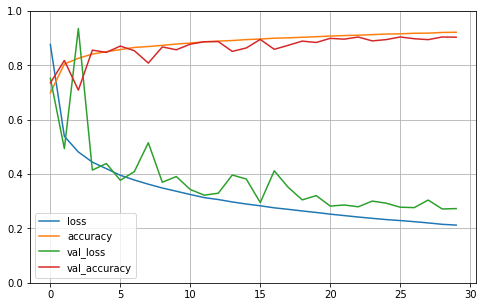

In [41]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show

In [44]:
ev = model.evaluate(X_test_n, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.2840 - accuracy: 0.8979


In [45]:
ev

[0.28399085998535156, 0.8978999853134155]

In [46]:
X_new = X_test[:3]

In [47]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [48]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

AxesImage(54,36;334.8x217.44)


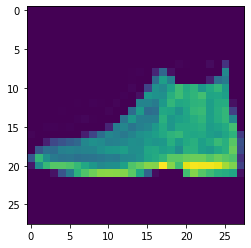

In [49]:
print(plt.imshow(X_test[0].reshape((28,28))))

As it can be seen, this model correctly predicting the class of image on new data. 